<a href="https://colab.research.google.com/github/yaelbab66/AddUser/blob/main/emotionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install py-feat using pip
!pip install py-feat

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from feat import Detector

In [22]:
pip install kaggle

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
! mkdir ~/.kaggle.

mkdir: cannot create directory ‘/root/.kaggle.’: File exists


In [38]:
! cp /content/kaggle.json ~/.kaggle/

In [39]:
! chmod 600 ~/.kaggle/kaggle.json

In [40]:
! kaggle datasets download ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 94% 61.0M/65.2M [00:00<00:00, 174MB/s]
100% 65.2M/65.2M [00:00<00:00, 160MB/s]


In [42]:
! unzip /content/emotion-detection-fer.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [27]:
!pip install -q torchsummary



In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ananthu017/emotion-detection-fer")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ananthu017/emotion-detection-fer/versions/1


/usr/local/lib/python3.10/dist-packages/feat/face_detectors/Retinaface/Retinaface_test.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load(
/us

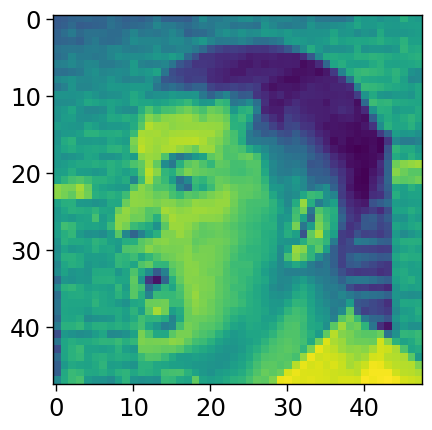

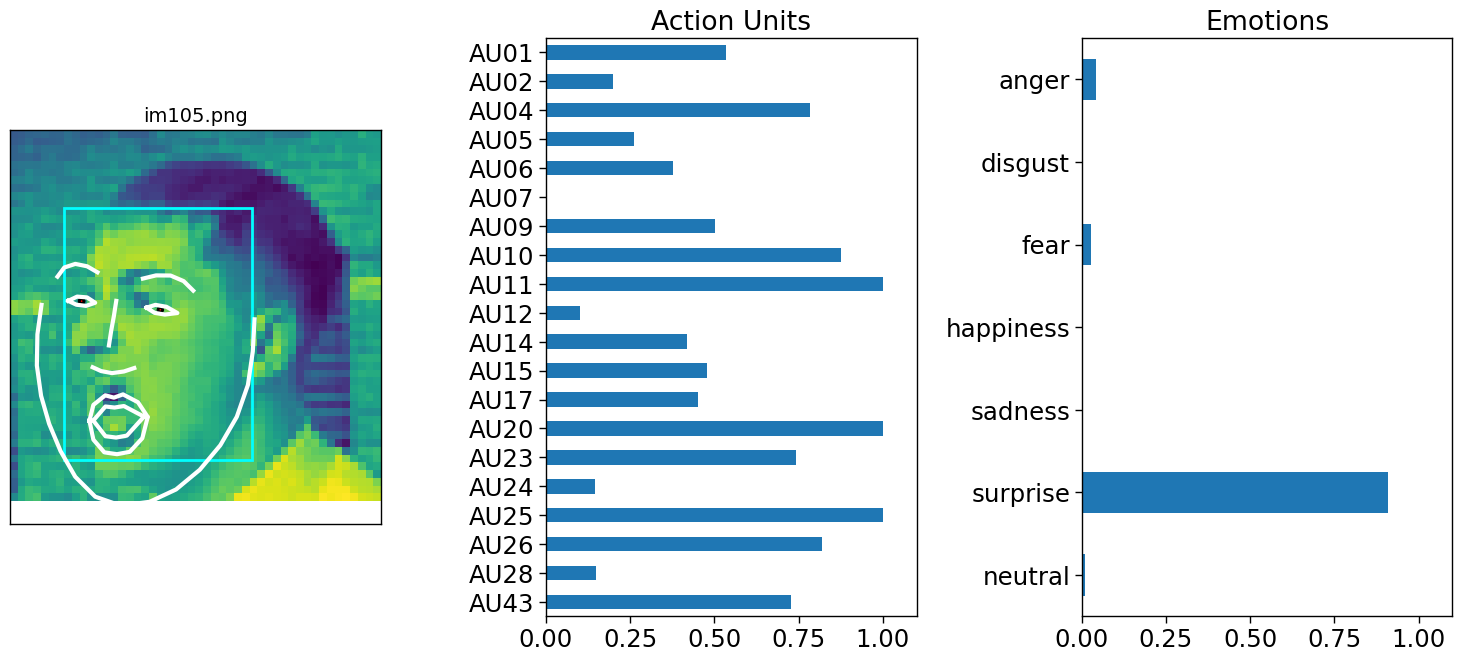

In [44]:
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "xgb"
emotion_model = "resmasknet"
detector = Detector(face_model=face_model, landmark_model=landmark_model, au_model=au_model,
                    emotion_model=emotion_model)
# load and visualize the image
test_image = '/content/test/angry/im105.png'
f, ax = plt.subplots()
im = Image.open(test_image)
ax.imshow(im)
image_prediction = detector.detect_image([test_image])
image_prediction.plot_detections()
plt.show()